# <h1><center>Workshop 5</center></h1>
## Objectives

- To learn the data preparation steps for generating a choropleth map
- To learn and practice the join operations required for merging the two geospatial datasets
- To extend the learning outcome of this session for solving the Task 1.1 of the assessment



# Geospatial Mapping of Global CO2 emissions


<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> This task requires you to use the dataset, World_CO2.csv. The dataset contains CO2 emission (in kt) corresponding to the various countries. Use GeoPandas, a Python based GIS tool to plot a choropleth map representing the world CO2 emissions for the year 2015.
     
 <span style='font-family:Georgia'> The solution for this task should describe all the major steps taken for generating the choropleth map. All the functions, libraries and coding steps should be explained in a lucid manner. The major steps for generating the choropleth would typically involve, importing the datasets using appropriate Python libraries, geospatial operations, and plotting. The ipynb should be able to reproduce the choropleth maps without any error.

</div>

<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> HINT 1: To plot choropleth maps during the studio session, we used naturalearth_lowres data available with GeoPandas. The geometry column played key role in transforming the polygon geometry of each country into corresponding map. In the World_CO2.csv we do not have such geometry column. On the other hand, we do have a column for country code. Can you notice similar kind of country code in naturalearth_lowres data? If yes, then can you think of a join operation which could enable you to use the geometry column of naturalearth_lowres for generating the desired choropleth map (Global CO2 emissions)?

</div>

<div class="alert alert-block alert-info">
    
 <span style='font-family:Georgia'> HINT 2: You may need to perform some data cleaning as part of the data pre-processing. This could involve removing the countries for which no or minimal data are available. This could also involve taking care of any missing values.
</div>

In [93]:
#import neccesary libraries
import pandas as pd
import geopandas as gpd
#pandas for readind and understanding the co2 data
#geopandas for understanding the world data


In [84]:
#load the two dataset to be used
df = pd.read_csv('/content/World_CO2.csv', skiprows=3)
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

<ipython-input-84-c23b1dd2a6dc>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


In [29]:
df.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,CO2 emissions (kt),EN.ATM.CO2E.KT,11092.675,11576.719,12713.489,12178.107,11840.743,10623.299,...,1349.456,861.745,872.746,898.415,883.747,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,414.371,491.378,689.396,707.731,839.743,1008.425,...,10755.311,9050.156,8467.103,9035.488,8672.455,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,550.050,454.708,1180.774,1151.438,1224.778,1188.108,...,34176.440,33692.396,44851.077,34583.477,34693.487,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,CO2 emissions (kt),EN.ATM.CO2E.KT,2024.184,2280.874,2464.224,2082.856,2016.850,2174.531,...,4924.781,4913.780,5489.499,4616.753,4536.079,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,487.711,476.710,462.042,465.709,469.376,NaN,NaN,NaN,NaN,NaN


In [85]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [86]:
#merging the datasets
# join data and geometry
# join data and geometry
gdf = gpd.GeoDataFrame(df.merge(world, left_on="Country Code", right_on="iso_a3"), crs="EPSG:4326")




In [87]:
gdf.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2018,2019,2020,Unnamed: 65,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,414.371,491.378,689.396,707.731,839.743,1008.425,...,NaN,NaN,NaN,NaN,38041754.0,Asia,Afghanistan,AFG,19291,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
1,Angola,AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,550.050,454.708,1180.774,1151.438,1224.778,1188.108,...,NaN,NaN,NaN,NaN,31825295.0,Africa,Angola,AGO,88815,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
2,Albania,ALB,CO2 emissions (kt),EN.ATM.CO2E.KT,2024.184,2280.874,2464.224,2082.856,2016.850,2174.531,...,NaN,NaN,NaN,NaN,2854191.0,Europe,Albania,ALB,15279,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
3,United Arab Emirates,ARE,CO2 emissions (kt),EN.ATM.CO2E.KT,11.001,11.001,18.335,22.002,18.335,22.002,...,NaN,NaN,NaN,NaN,9770529.0,Asia,United Arab Emirates,ARE,421142,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,Argentina,ARG,CO2 emissions (kt),EN.ATM.CO2E.KT,48815.104,51180.319,53695.881,50083.886,55727.399,58866.351,...,NaN,NaN,NaN,NaN,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


<Axes: >

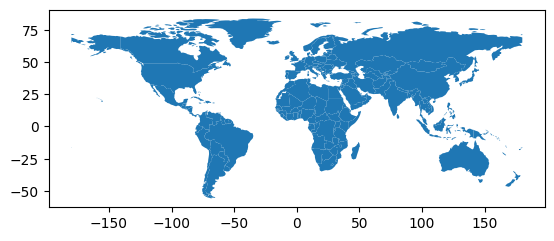

In [92]:
gdf.plot(legend_kwds={"label": "World Map", "orientation": "horizontal"})

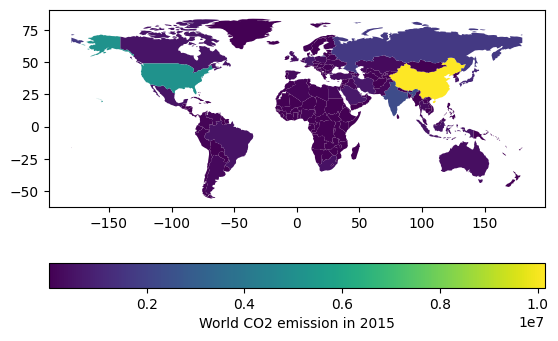

In [91]:
gdf.plot(

    column="2015",

    legend=True,

    legend_kwds={"label": "World CO2 emission in 2015", "orientation": "horizontal"},

);

You are required to submit a copy of this solved Jupyter notebook through the Workshop 5 Submission Point on the Moodle. Please note that your submission should only contain the workshop task and you must NOT submit any actual task of the assessment at this stage.